In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%cd '../'

/Users/lolo/quantic/science/HomeHots/HOTS_clone_laurent


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import time

from HOTS.ToolsMonitor import GenerateActivationMap, DisplayActivationMap
from HOTS.Event import Event, SimpleAlphabet, LoadNMNIST
from HOTS.STS import STS
from HOTS.Layer import ClusteringLayer
from HOTS.ToolsMonitor import (
    DisplayImage,
    DisplaySurface3D,
    DisplaySurface2D,
    DisplayConvergence,
)
from HOTS.Tools import SaveObject, LoadObject
from HOTS.Classifier import Classifier
from HOTS.Network import Network
from HOTS.KmeansLagorce import KmeansLagorce
from HOTS.KmeansMaro import KmeansMaro
from HOTS.Event import conv2eve

tau = 9e-4 # -> tau=1ms, si on prend 10 ms on est à 1s pour la dernière couche et les vidéos font 0.3s en moyenne
R = 2
filthr = 2
nbkNN = 3
algo = 'lagorce'
decay = 'exponential'
hom = True
krnlinit = 'rdn'
nb_cluster = [4, 8, 16]
ImageSize = (34, 34)
DataPath = 'Data/testsetnmnist.p'

NbClusteringData = 15
NbTrainingData = 40
NbTestingData = 40
_1ofich = True
event_tr, event_te, event_cl, label_tr, label_te = LoadNMNIST(
NbTrainingData, NbTestingData, NbClusteringData, OneOfEach=_1ofich, Path=DataPath, OutOnePolarity=False, ListPolarities=None, verbose=0)

[1, 2, 5, 8, 4, 6, 3, 9, 0, 7]


In [3]:
event_tr.address.shape, label_tr

((159884, 2),
 array([[1.],
        [2.],
        [5.],
        [8.],
        [4.],
        [6.],
        [3.],
        [9.],
        [0.],
        [7.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

In [4]:
label_tr.shape

(40, 1)

In [5]:
event_tr.polarity, event_te.ListPolarities, event_cl.ListPolarities

(array([1, 1, 0, ..., 0, 0, 0]), array([0, 1]), array([0, 1]))

In [30]:
import pickle
Path = 'Data/testsetnmnist.p'
EVE = pickle.load(open(Path, "rb" ))

In [7]:
len(EVE)

10000

In [8]:
for i in range(1500, 1501):
    one_list_of_events_for_one_digit = EVE[i]
    print(one_list_of_events_for_one_digit.l)

1


In [18]:
#timestr = time.strftime("%Y%m%d")
hom = False
timestr = '20201021'
if hom==True:
    fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_'+str(tau*1000)+'ms_'+algo+'_homeo.pkl'
else:
    fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_'+str(tau*1000)+'ms_'+algo+'.pkl'
print(fname)

L1 = ClusteringLayer(tau=tau,R=R,verbose=0,ThrFilter=filthr,LearningAlgo=algo,kernel=decay,homeo=hom,init=krnlinit)
L2 = ClusteringLayer(tau=10 * tau,R=2 * R,verbose=0,ThrFilter=filthr,LearningAlgo=algo,kernel=decay,homeo=hom,init=krnlinit)
L3 = ClusteringLayer(tau=10 * 10 * tau,R=2 * 2 * R,verbose=0,ThrFilter=filthr,LearningAlgo=algo,kernel=decay,homeo=hom,init=krnlinit)
Net = Network([L1, L2, L3])

Records/EXP_03_NMNIST/20201021_hots_0.9ms_lagorce.pkl


In [27]:
if not os.path.isfile(fname):
    ClusterLayer, event_output = Net.TrainCluster(
            event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=1
        )
    SaveObject(ClusterLayer, fname)
else: 
    ClusterLayer, Classif0 = LoadObject(fname)

prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=True)

battacha:52.5% ### normalized:42.5% ### euclidian:45.0% ### 


In [28]:
homrun = False
event0_o_tr2 = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer, homrun=homrun)
event0_o_te2 = Net.RunNetwork(event_te, NbClusterList=ClusterLayer, homrun=homrun)


In [29]:
Classif02 = Classifier(event0_o_tr2, event0_o_te2, TrainingLabel=label_tr, GroundTruth=label_te)
prediction2, accuracy2, method2 = Classif02.HistogramDistance(knn=nbkNN, to_print=True)

Classif02

Classif02.event_train.time

battacha:50.0% ### normalized:42.5% ### euclidian:35.0% ### 


array([0.031572, 0.031755, 0.031981, ..., 0.299381, 0.301578, 0.302217])

### Loading only on digit of each for logistic regression

In [ ]:
ImageSize

In [ ]:
len(event_te.ChangeIdx)

In [ ]:
event0_o_te2.ChangeIdx.shape, event0_o_te2.ChangeIdx

In [ ]:
label_tr.shape#, label_tr

In [ ]:
event0_o_te2.address.shape, event0_o_te2.polarity.shape, event0_o_te2.time.shape

In [ ]:
event0_o_te2.ChangeIdx

In [ ]:
event0_o_te2.ListPolarities

In [ ]:
event0_o_te2

### Building matrix for logistic regression

In [ ]:
np.save?

In [14]:
#fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_vectorzLR.pkl'
fname = '/tmp/'+timestr+'_hots_vectorzLR'
if not os.path.isfile(fname + '_X.npy'):
    data_len = ImageSize[0]*ImageSize[1]*len(event0_o_tr2.ListPolarities)
    n_events = event0_o_tr2.time.shape[0]
    tau_cla = 1e-2

    X = np.zeros((n_events, data_len))
    y = np.zeros((n_events,))
    data = np.zeros((ImageSize[0], ImageSize[1], len(event0_o_tr2.ListPolarities))) #tmp data

    t_old = 0
    i_label_tr = 0
    for i in range(1, n_events):
        if i == event0_o_te2.ChangeIdx[i_label_tr]:
            i_label_tr += 1

        t_new = event0_o_tr2.time[i]
        data *= np.exp(-(t_new-t_old)/tau_cla)
        data[event0_o_tr2.address[i, 0], event0_o_tr2.address[i,1], event0_o_tr2.polarity[i]] = 1.

        X[i, :] = data.ravel()
        y[i] = label_tr[i_label_tr]

    plt.imshow(X[:10000]);
    print('Number of events: '+str(X.shape[0])+' - Number of features: '+str(X.shape[1]))
    #SaveObject([X,y], fname)
    np.save(fname + '_X.npy', X)
    np.save(fname + '_y.npy', y)
    
else: 
    #X,y = LoadObject(fname)
    X = np.load(fname + '_X.npy')
    y = np.load(fname + '_y.npy')
    

In [15]:
X.shape

(33868, 18496)

### Performing logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR(random_state=0).fit(X, y)

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
lr.score(X, y)

0.46264910830282274

In [24]:
P_pred = lr.predict_proba(X)
P_pred.shape

(33868, 10)

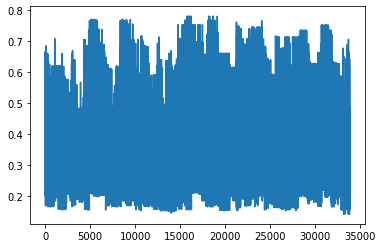

In [25]:
plt.plot(np.max(P_pred, axis=1))